In [1]:
import re
from functools import reduce
from matplotlib import pylab as plt
import os
import numpy as np


plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

In [2]:
with open('outputs/mnist_first_output.txt', 'r') as fin:
    s = fin.readlines()[:448]
#     print(re.findall('Valid: \[50/50\] Final Prec@1 \d\d\.\d{4}\\%', 'Valid: [50/50] Final Prec@1 99.1233%'))
    final_scores_str = re.findall('Valid: \[ ?\d+/50\] Final Prec@1 \d\d\.\d{4}\\%',
                              str(reduce(lambda el, acm : acm + el, s, '')))
    final_scores_str = list(reversed(final_scores_str))
    print(final_scores_str)

['Valid: [ 1/50] Final Prec@1 85.1300%', 'Valid: [ 2/50] Final Prec@1 95.9000%', 'Valid: [ 3/50] Final Prec@1 96.0067%', 'Valid: [ 4/50] Final Prec@1 96.2733%', 'Valid: [ 5/50] Final Prec@1 97.2100%', 'Valid: [ 6/50] Final Prec@1 97.7500%', 'Valid: [ 7/50] Final Prec@1 97.4067%', 'Valid: [ 8/50] Final Prec@1 97.8467%', 'Valid: [ 9/50] Final Prec@1 97.3933%', 'Valid: [10/50] Final Prec@1 98.2967%', 'Valid: [11/50] Final Prec@1 97.9633%', 'Valid: [12/50] Final Prec@1 98.2233%', 'Valid: [13/50] Final Prec@1 98.5400%', 'Valid: [14/50] Final Prec@1 98.3567%', 'Valid: [15/50] Final Prec@1 98.5833%', 'Valid: [16/50] Final Prec@1 98.4133%', 'Valid: [17/50] Final Prec@1 98.5300%', 'Valid: [18/50] Final Prec@1 98.5867%', 'Valid: [19/50] Final Prec@1 98.7200%', 'Valid: [20/50] Final Prec@1 98.7133%', 'Valid: [21/50] Final Prec@1 98.7967%', 'Valid: [22/50] Final Prec@1 98.7600%', 'Valid: [23/50] Final Prec@1 98.6333%', 'Valid: [24/50] Final Prec@1 98.7333%', 'Valid: [25/50] Final Prec@1 98.7200%',

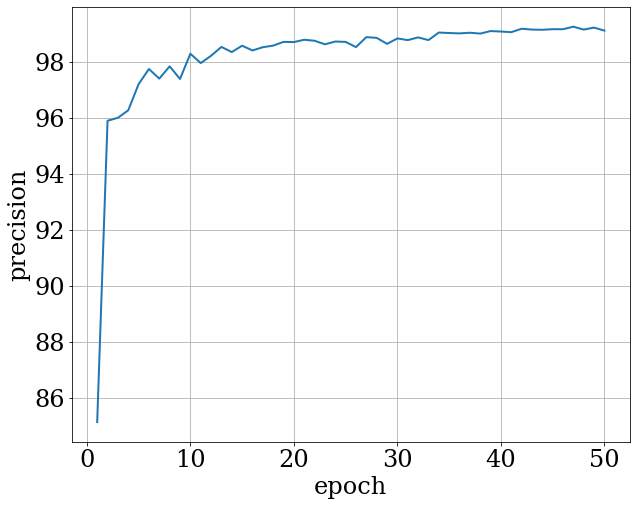

In [3]:
plt.figure(figsize=(10, 8))
final_scores = [float(el[-8:-1]) for el in final_scores_str]
plt.plot(range(1, 51), final_scores)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('precision')
plt.savefig('first_exp.png')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


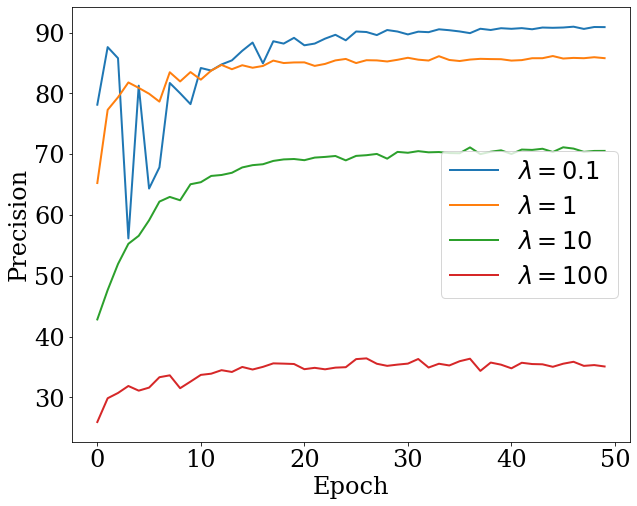

In [20]:
def get_result(lam):
    with open(f'outputs/mnist_l{lam}_seed_0.txt', 'r') as fin:
        s = fin.readlines()
        final_scores_str = re.findall('Valid: \[ ?\d+/50\] Final Prec@1 \d\d\.\d{4}\\%',
                                  str(reduce(lambda el, acm : acm + el, s, '')))
        final_scores_str = list(reversed(final_scores_str))
        return list(map(lambda el : float(el[-8:-1]), final_scores_str))[:50]
# TEST
lambda_array = [0.1, 1, 10, 100]
resuls = [get_result(l) for l in lambda_array]
plt.figure(figsize=(10, 8))
for r, l in zip(resuls, lambda_array):
    plt.plot(range(len(r)), r, label=f'$\lambda = {l}$')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.savefig('../fig/basic_exp.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


lambda = 0\.1, len(f_scores) = 250
(5, 50)
lambda = 1e\+00, len(f_scores) = 250
(5, 50)
lambda = 1e\+01, len(f_scores) = 250
(5, 50)
lambda = 1e\+02, len(f_scores) = 250
(5, 50)


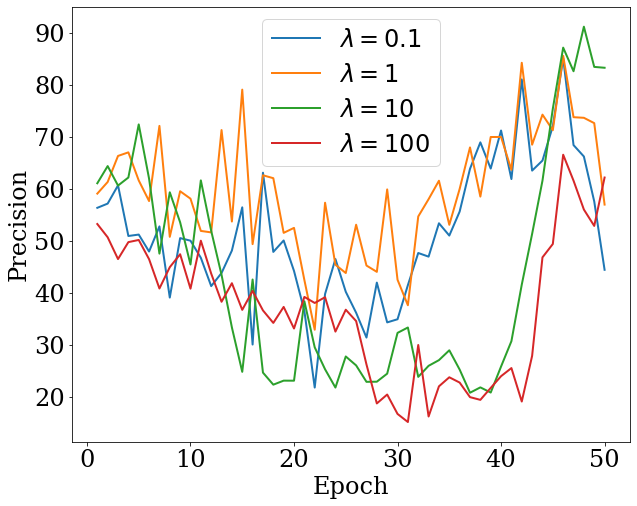

In [19]:
# main experimant
def parse_exp(filename, extd=False):
    with open('outputs/' + filename, 'r') as fin:
        s = str(reduce(lambda  el, acm : acm + el, fin.readlines(), ''))
        result = []
        for lam in ['0\.1', '1e\+00', '1e\+01', '1e\+02']:
            f_scores = re.findall('\d{1,2}.\d{4}\\%\; lambda = ' + lam, s)
            print(f'lambda = {lam}, len(f_scores) = {len(f_scores)}')
            f_scores_float = np.array(list(map(lambda el: float(el[:el.find('%')]), f_scores)))
            # f_scores_float = f_scores_float[:50]  # seed = 0
            # result.append(f_scores_float)
            if not extd:
                f_scores_float = f_scores_float.reshape(5, 50)
            print(f_scores_float.shape)
            if not extd:
                result.append((f_scores_float.mean(axis=0), f_scores_float.std(axis=0)))
            else:
                result.append((f_scores_float[:50], [0] * 50))
        return result

res = parse_exp('mnist_hypernet.txt')
# res_ext = parse_exp('mnist_extended_hypernet.txt')
plt.figure(figsize=(10, 8))
for (m, sigma), lam in zip(res, [0.1, 1, 10, 100]):
    plt.plot(range(1, 51), m, label=f'$\lambda = {lam}$')
    # plt.fill_between(range(1, 51), m-sigma, m+sigma)

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.savefig('../fig/main_exp.eps')
plt.show()

lambda = 0\.0001, len(f_scores) = 100
lambda = 0\.001, len(f_scores) = 100
lambda = 0\.01, len(f_scores) = 100
lambda = 0\.1, len(f_scores) = 100


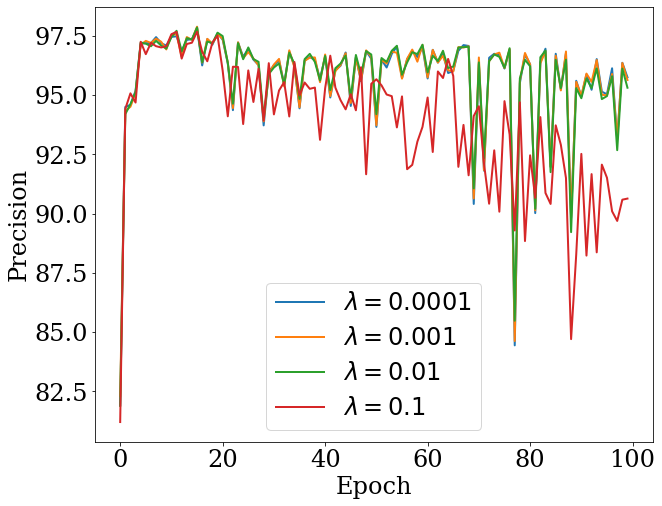

In [10]:
def get_result():
    with open(f'outputs/mnist_100_hypernet.txt', 'r') as fin:
        res = []
        s = fin.readlines()
        for lam in ['0\.0001', '0\.001', '0\.01', '0\.1']:
            final_scores_str = re.findall('\d\d\.\d{4}\\%; lambda = ' + lam,
                                  str(reduce(lambda el, acm : acm + el, s, '')))
            final_scores_str = list(final_scores_str)
            print(f'lambda = {lam}, len(f_scores) = {len(final_scores_str)}')
            f_scores_float = np.array(list(map(lambda el: float(el[:el.find('%')]), final_scores_str)))
            res.append(list(reversed(f_scores_float)))
        return res

res = get_result()
# print(res[0])

plt.figure(figsize=(10, 8))
for i, lam in enumerate([0.0001, 0.001, 0.01, 0.1]):
    plt.plot(res[i], label=f'$\lambda = {lam}$')
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.savefig('../fig/main_100_exp.png')
plt.show()